# Weather Data Plot

The data for this project comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

Steps:

1. Return a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice!

The data given is **Ann Arbor, Michigan, United States**

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

In [2]:
df0 = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#Convert Date to DateTime so that can group by month-day
df0['Date'] = pd.to_datetime(df0['Date'])
df0.set_index('Date', inplace=True)

#Filter 2005-2014 and 2015 data. Use agg to get max/min
#Get data ready for graph: drop Feb29, drop level and keep min/max, scale down temperature

#2005-2014 Data

df1 = df0[df0.index<'2015']
df1 = df1.groupby([df1.index.month, df1.index.day]).agg({'Data_Value':[max, min]})

df2 = df1.drop((2,29)).reset_index()
df2 = df2[['Data_Value']]
df2.columns = df2.columns.droplevel()
df2['min'] = df2['min']/10
df2['max'] = df2['max']/10


#2015 Data

df2015 = df0[df0.index>='2015']
df2015 = df2015.groupby([df2015.index.month, df2015.index.day]).agg({'Data_Value':[max, min]})

df2015.reset_index(inplace=True)
df2015 = df2015[['Data_Value']]
df2015.columns = df2015.columns.droplevel()
df2015['min'] = df2015['min']/10
df2015['max'] = df2015['max']/10

dfconcat = pd.concat([df2015,df2], ignore_index=True, axis =1)
dfconcat.columns = ['max2015','min2015','maxdf2','mindf2']
df_2015max = dfconcat.query('max2015 > maxdf2')
df_2015min = dfconcat.query('min2015 < mindf2')

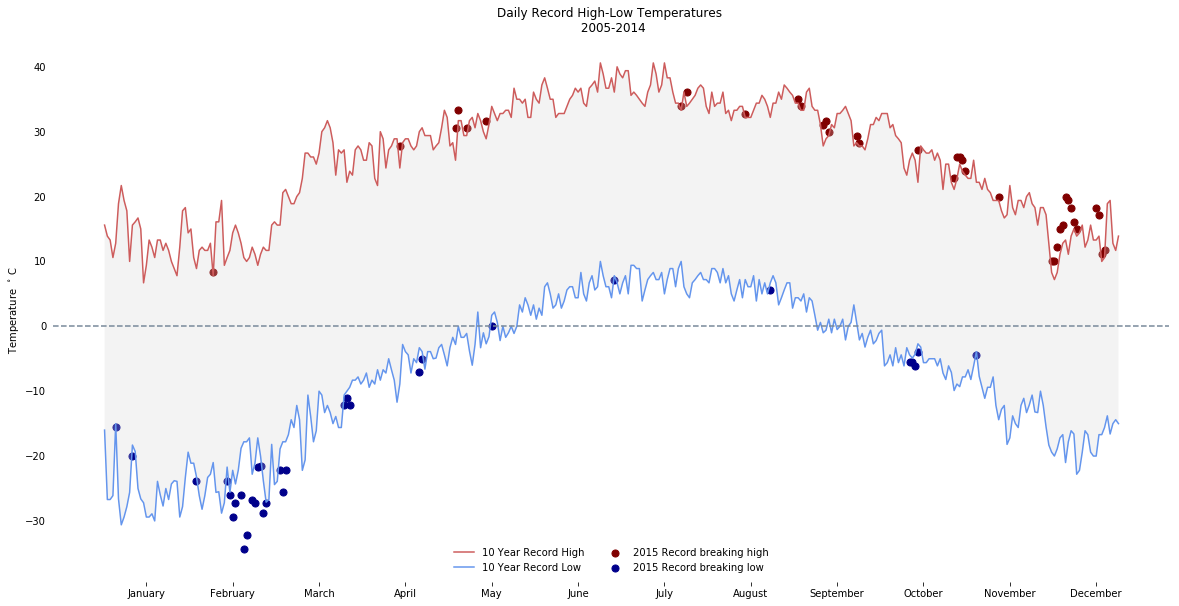

In [3]:
plt.figure()

#2005-2014 Line Plot
plt.plot(df2['max'], color = 'indianred', label = '10 Year Record High')
plt.plot(df2['min'], color = 'cornflowerblue', label = '10 Year Record Low')

#2015 Scatter Plot

plt.scatter(df_2015max.index, df_2015max['max2015'], s=50, color = 'maroon', label='2015 Record breaking high')
plt.scatter(df_2015min.index, df_2015min['min2015'], s=50, color = 'darkblue',label='2015 Record breaking low')

#Plot editing
plt.axhline(y=0, color='lightslategrey', linestyle='--')
plt.fill_between(df2015.index, df2['max'], df2['min'], facecolor='lightgrey', alpha = 0.25)
plt.ylabel('Temperature  $^{\circ}$ C')
plt.title('Daily Record High-Low Temperatures \n 2005-2014')
plt.legend(framealpha=1, frameon=False, loc='lower center', ncol=2) #plots only lines that have a label

#Setting ticks, 15-380 so that are centered
months = ['January','February','March', 'April','May','June','July','August','September','October','November','December']
plt.xticks(np.arange(15, 380, step=31), months)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False) 

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')
plt.gcf().set_size_inches(20, 10)

plt.savefig('temperatures.png', dpi=300, bbox_inches='tight')
plt.show()
